<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R_v2/blob/main/Clases/Clase7/Clase7_1_Regresion_lineal_en_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 8: Regresión lineal en R

**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales Méndez<br>
**E-mail ayudante:** rumorale1@gmail.com

## Especificación matemática del problema


Supongamos que interesa predecir el nivel de ventas de un determinado producto en función de los montos invertidos en distintos medios de publicidad (tv, radio, periódico).


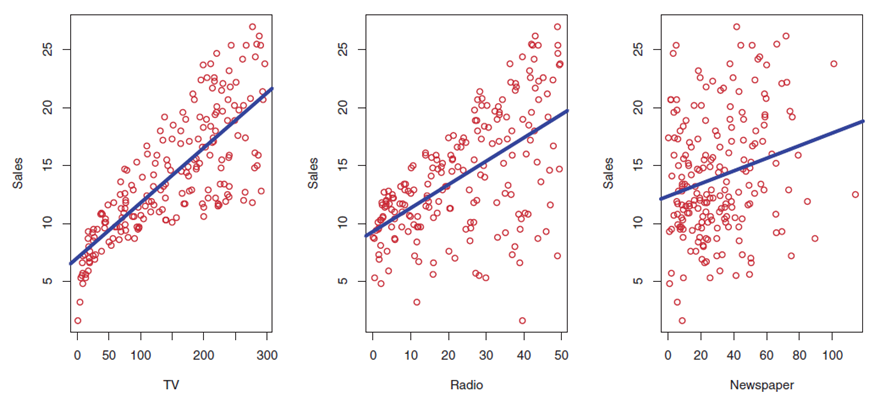

En general, el problema podría expresarse matemáticamente de la siguiente manera:
  \begin{align}
  Y &= f(X) + \epsilon  \ \ \ \ \ \ \ \ (1)
  \end{align}
  
Donde $X$ contiene a las variables explicativas (monto en tv, radio y periódico en el ejemplo), y $\epsilon$ es un error aleatorio no observable.
En esta especificación, f es una función desconocida y que buscamos estimar.
En términos simples, diremos que un modelo es de regresión, cuando en la expresión (1), la variable de interés a predecir, Y, es una variable numérica.

## Modelo de regresión lineal

Cuando el modelo $f$ a estimar, se asume como una función lineal (en los parámetros), diremos que (1) es un modelo de regresión lineal. En tal caso, el modelo matemático queda expresado de la siguiente manera:
   \begin{align}
   Y=\beta_0+\beta_1 X_1+\beta_2 X_2+…+\beta_p X_p  +\epsilon 
   \end{align}
Donde $\beta_i,i=0,. . .,p$ son los parámetros a estimar (estos parámetros definen al modelo), y $\epsilon$ es un error aleatorio no observable, típicamente siguiendo una distribución aleatoria normal $𝑁(0,\sigma^2)$.

### Nota:

Cuando los coeficientes a estimar (betas), o alguna función de ellos corresponde a una exresión no lineal, el modelo de regresión deja de serlo también. Por ejemplo, una especifiacción de la forma 
$Y = \beta_0 + \beta_1 \beta_2 X_1+ \beta_2 X_2 $ es un modelo no lineal, mientras que $Y = \beta_0 + \beta_1X_1+ \beta_2 X^3_2 $ sí lo es.

## Estimación de coeficientes

Tanto en R como en la mayoría de los softwares, la manera estándar de estimar los coeficientes en un modelo de regresión, es mediante la estimación vía mínimos cuadrados, donde se busca minimizar la suma residual:
$\sum\limits_{𝑖=1}^n (\hat{y}_i−y_i )^2 $
No entraremos en detalle, respecto de las bondades de esta estimación y que coincide con otros estimadores en el caso de la regresión lineal con errores normales.

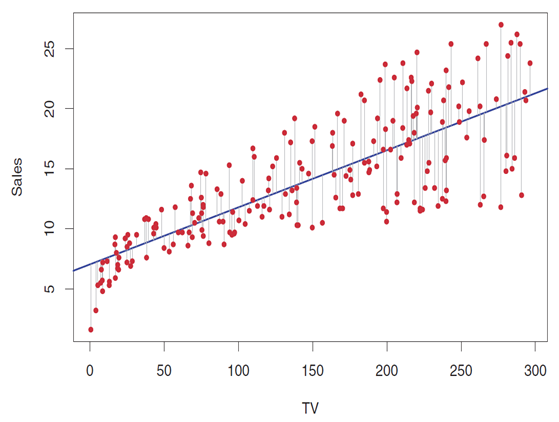

Sin entrar en más detalles técnicos, veamos como podemos ajustar una regresión lineal en R.
Para ello podemos utilizar la función `lm()`, del paquete base. Esta recibe como argumento principal una formula y un datasets, del siguiente modo.<br>
<center>`lm(formula = y ~ x1 + x2 + ... + xp, data = dataset)`</center>
    <br>
Generemos nuestra primera regresión lineal con el dataset _Advertising_. El cual contiene las ventas totales de un producto y los montos invertidos en tres tipos de publicidad (tv, radio, periódico). En esta primera iteración consideremos solamente la variable newspapper.

In [1]:
library(ggplot2)
ventas <- read.csv("https://raw.githubusercontent.com/majorquev/Introduccion_a_ciencia_de_datos_R_v2/master/Clases/Clase7/Advertising.csv",h=T)


In [3]:
head(ventas) # El X es in id de fila.
dim(ventas)

ventas$X <- NULL

,X,TV,radio,newspaper,sales
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2


[1] 200   5

In [4]:
head(ventas)

,TV,radio,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


Aquí, estamos asumiento que el modelo es $Y = \beta_0 + \beta_1X_1+ \epsilon$, donde $X_1$ corresponde a la variable _newspaper_ e  $Y$ a _sales_ 

In [5]:
# Creamos nuestro primer modelo lineal considerando newspaper.
mod1 <- lm(formula = sales ~ newspaper, data = ventas)

In [6]:
# Clase, estructura y resumen del modelo
class(mod1)

[1] "lm"

In [7]:
str(mod1)

List of 12
 $ coefficients : Named num [1:2] 12.3514 0.0547
  ..- attr(*, "names")= chr [1:2] "(Intercept)" "newspaper"
 $ residuals    : Named num [1:200] 5.96 -4.42 -6.84 2.95 -2.65 ...
  ..- attr(*, "names")= chr [1:200] "1" "2" "3" "4" ...
 $ effects      : Named num [1:200] -198.31 -16.8 -6.69 2.94 -2.66 ...
  ..- attr(*, "names")= chr [1:200] "(Intercept)" "newspaper" "" "" ...
 $ rank         : int 2
 $ fitted.values: Named num [1:200] 16.1 14.8 16.1 15.6 15.5 ...
  ..- attr(*, "names")= chr [1:200] "1" "2" "3" "4" ...
 $ assign       : int [1:2] 0 1
 $ qr           :List of 5
  ..$ qr   : num [1:200, 1:2] -14.1421 0.0707 0.0707 0.0707 0.0707 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:200] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "(Intercept)" "newspaper"
  .. ..- attr(*, "assign")= int [1:2] 0 1
  ..$ qraux: num [1:2] 1.07 1.04
  ..$ pivot: int [1:2] 1 2
  ..$ tol  : num 1e-07
  ..$ rank : int 2
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 198


In [10]:
mod1$residuals # y_est - y_real, corresponden a los residuos ajustados

1            2            3            4            5            6 
  5.96383052  -4.41806581  -6.84163879   2.94904667  -2.64548402  -9.25338945 
           7            8            9           10           11           12 
 -1.83669488   0.21415299  -7.60610017  -2.91090076  -5.07498005   4.82982054 
          13           14           15           16           17           18 
 -6.75568226  -3.04519738   4.13271040   7.15532802  -6.08642030   8.99671804 
          19           20           21           22           23           24 
 -2.05229077   1.20395475   2.72798147  -1.13669488  -9.46418475   1.71563375 
          25           26           27           28           29           30 
 -3.65229077  -1.41792249   1.95945989   2.29612098   5.29612098  -4.08288549 
          31           32           33           34           35           36 
  6.68585108  -2.56256067  -4.39220002   5.03218500  -3.25613600  -0.01629841 
          37           38           39           40           41           42 
 12.77512744  -0.15088167  -4.17113483   7.39841378   2.52029102   2.63197002 
          43           44           45           46           47           48 
  8.25014535  -0.89530487  -6.21961823   0.82576033  -3.70395068   9.83677061 
          49           50           51           52           53           54 
 -0.28059268  -4.66411309  -2.84378828  -1.84830222   8.08274623   5.63810805 
          55           56           57           58           59           60 
  6.97897267   8.06700702  -9.11570135  -0.05931250   9.38666312   5.53994711 
          61           62           63           64           65           66 
 -5.42183938   8.85688044   1.85547134   1.18917090   4.06796238  -3.10063086 
          67           68           69           70           71           72 
 -2.97173189   0.49072333   5.94696885   8.46094065   3.83197002  -1.68517829 
          73           74           75           76           77           78 
 -4.60698387  -3.06330105   3.93211334  -8.54097007  -6.58355421   1.07195093 
          79           80           81           82           83           84 
 -7.56552219  -2.61481764  -1.77106317  -2.06958240  -2.82893277  -0.69848137 
          85           86           87           88           89           90 
  7.49996620  -0.74474364  -1.22649664   0.19198911  -3.46588050   1.53736767 
          91           92           93           94           95           96 
 -1.66005289  -6.85627932   3.82170012   5.89428191  -1.44756184   1.65532802 
          97           98           99          100          101          102 
 -0.97409635   1.94534476  10.24830629   2.33817971  -3.37512337   5.93005929 
         103          104          105          106          107          108 
  1.27816062   1.36958647   8.05871951   3.62170012  -6.77579209  -4.92028695 
         109          110          111          112          113          114 
 -8.45155039   7.14778089  -2.04156713   8.17971305   1.61732949   2.96337678 
         115          116          117          118          119          120 
  0.36168103  -2.63373336  -1.55155039  -3.76086493  -0.78310047  -6.97106317 
         121          122          123          124          125          126 
  0.62177178  -8.10793923  -1.60461941   2.17039851   3.29036502  -3.16795832 
         127          128          129          130          131          132 
 -8.51887785  -4.05458358  12.17357502  -5.00867961 -11.22723703  -2.00321030 
         133          134          135          136          137          138 
 -6.76626258   4.78193419  -5.13927433  -1.21629841  -3.36005289   5.18341495 
         139          140          141          142          143          144 
 -3.87261559   8.25561466  -2.15694804   2.71379469   5.67572450  -3.83284966 
         145          146          147          148          149          150 
 -3.07896860  -2.54364496   0.37276297  10.62568867  -2.10225494  -3.37808490 
         151          152          153          154          

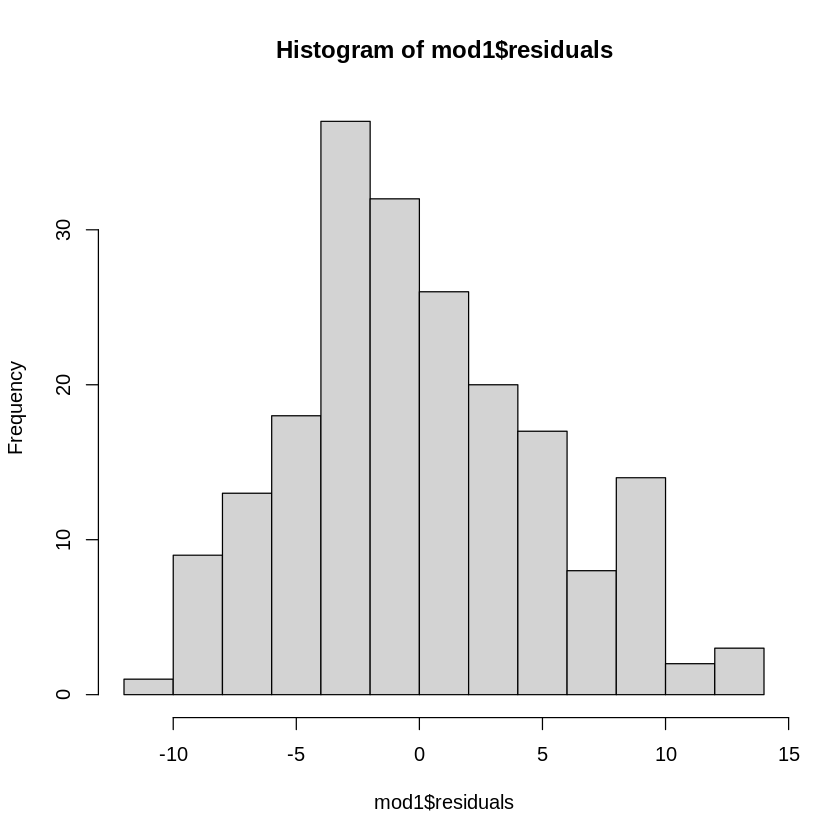

In [11]:
hist(mod1$residuals)

In [12]:
mod1$fitted.values # Los valores ajustados (en la recta) para cada valor de Newspaper

1        2        3        4        5        6        7        8 
16.13617 14.81807 16.14164 15.55095 15.54548 16.45339 13.63669 12.98585 
       9       10       11       12       13       14       15       16 
12.40610 13.51090 13.67498 12.57018 15.95568 12.74520 14.86729 15.24467 
      17       18       19       20       21       22       23       24 
18.58642 15.40328 13.35229 13.39605 15.27202 13.63669 15.06418 13.78437 
      25       26       27       28       29       30       31       32 
13.35229 13.41792 13.04054 13.60388 13.60388 14.58289 14.71415 14.46256 
      33       34       35       36       37       38       39       40 
13.99220 12.36781 12.75614 12.81630 12.62487 14.85088 14.27113 14.10159 
      41       42       43       44       45       46       47       48 
14.07971 14.46803 12.44985 13.79530 14.71962 14.07424 14.30395 13.36323 
      49       50       51       52       53       54       55       56 
15.08059 14.36411 14.24379 12.54830 14.51725 15.56189 13.22103 15.63299 
      57       58       59       60       61       62       63       64 
14.61570 13.25931 14.41334 12.86005 13.52184 15.34312 13.84453 12.81083 
      65       66       67       68       69       70       71       72 
13.93204 12.40063 12.47173 12.90928 12.95303 13.83906 14.46803 14.08518 
      73       74       75       76       77       78       79       80 
13.40698 14.06330 13.06789 17.24097 13.48355 13.12805 12.86552 13.61482 
      81       82       83       84       85       86       87       88 
13.57106 14.36958 14.12893 14.29848 14.20003 15.94474 13.22650 15.80801 
      89       90       91       92       93       94       95       96 
16.36588 15.16263 12.86005 14.15628 15.57830 16.30572 12.94756 15.24467 
      97       98       99      100      101      102      103      104 
12.67410 13.55466 15.15169 14.86182 15.07512 17.86994 13.52184 13.33041 
     105      106      107      108      109      110      111      112 
12.64128 15.57830 13.97579 13.62029 13.75155 12.65222 15.44157 13.62029 
     113      114      115      116      117      118      119      120 
12.48267 12.93662 14.23832 15.23373 13.75155 13.16086 16.68310 13.57106 
     121      122      123      124      125      126      127      128 
14.87823 15.10794 13.20462 13.02960 16.40963 13.76796 15.11888 12.85458 
     129      130      131      132      133      134      135      136 
12.52642 14.70868 12.82724 14.70321 12.46626 14.81807 15.93927 12.81630 
     137      138      139      140      141      142      143      144 
12.86005 15.61659 13.47262 12.44439 13.05695 16.48621 14.42428 14.23285 
     145      146      147      148      149      150      151      152 
14.47897 12.84364 12.82724 14.77431 13.00225 13.47808 14.37505 15.01496 
     153      154      155      156      157      158      159      160 
13.12805 14.41334 12.87099 12.66316 15.11341 13.68045 14.82354 14.24379 
     161      162      163      164      165      166      167      168 
14.03049 15.04778 13.75155 12.75614 12.64675 16.98938 13.53278 13.41245 
     169      170      171      172      173      174      175      176 
15.50173 12.70144 13.35776 14.94386 13.28119 13.05148 13.06789 14.63758 
     177      178      179      180      181      182      183      184 
13.46168 14.27660 13.64763 13.31401 12.80536 13.85000 13.97579 16.27837 
     185      186      187      188      189      190      191      192 
13.99220 13.42339 13.80624 13.34682 12.55377 13.63123 12.66863 12.67957 
     193      194      195      196      197      198      199      200 
14.07971 12.54830 12.67957 13.10617 12.79442 12.70144 15.97209 12.82724

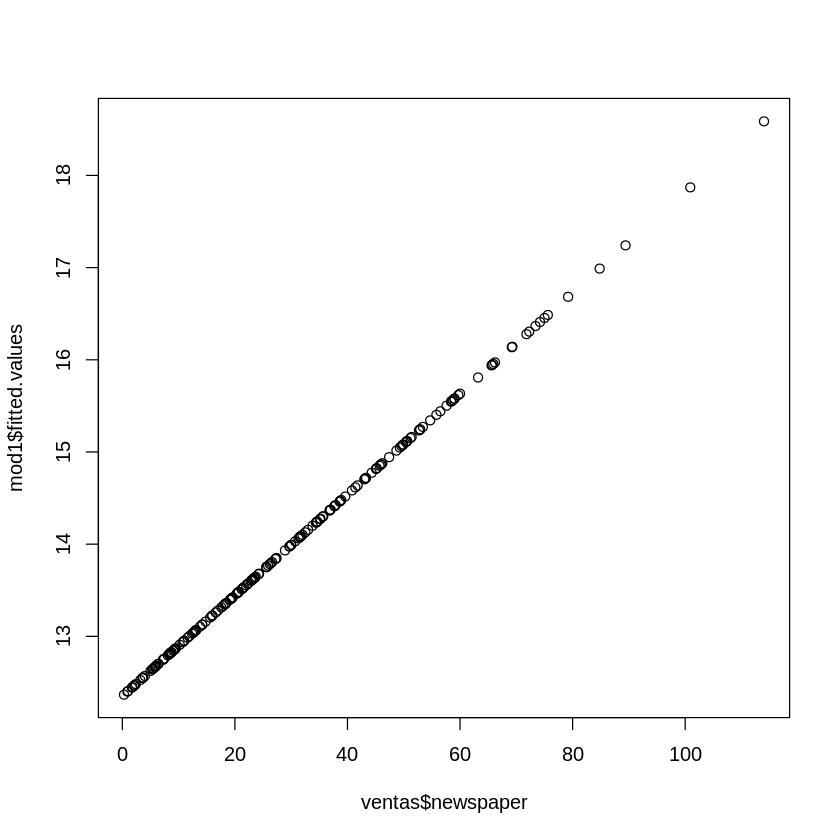

In [13]:
plot(ventas$newspaper, mod1$fitted.values) # Cada punto se corresponde con su valor "predicho" por el modelo lineal

In [14]:
summary(mod1)


Call:
lm(formula = sales ~ newspaper, data = ventas)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2272  -3.3873  -0.8392   3.5059  12.7751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.35141    0.62142   19.88  < 2e-16 ***
newspaper    0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.092 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148


Del resumen anterior podemos observar la siguiente información

   * **Residuals:** Muestra estadísticos de posición de los residuos obtenidos.
   * **Coefficients:** Muestra los valores de los coeficientes estimados del modelo, junto con su error estándar ($\sqrt{\hat{Var}(\hat{\beta}_i)}$), el valor del estadístico *t*,  con el cual es posible evaluar la  significacncia del parámetro estimado, y el valor-p asociado a dicha prueba.
   * **Residual standar error:** Error standar del ajuste. Corresponde a la raiz cuadrada del error cuadrático medio (penalizado por los grados de libertad).
   * **Multuple R-squared:** Corresponde al porcentaje de la varianza explicada por el modelo.
   * **Adjusted R-squared:** Corresponde a una versión penalizada del $R^2$. Toma en cuenta posibles sobre ajustes del modelo.
   * **F-statistic:** Estadistico asociado al test F de Ficsher para evaluar la significancia del modelo. 

In [15]:
# Podemos generar un nuevo modelo sólo con la variables TV
mod2 <- lm(sales ~ TV, data = ventas)
summary(mod2)


Call:
lm(formula = sales ~ TV, data = ventas)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


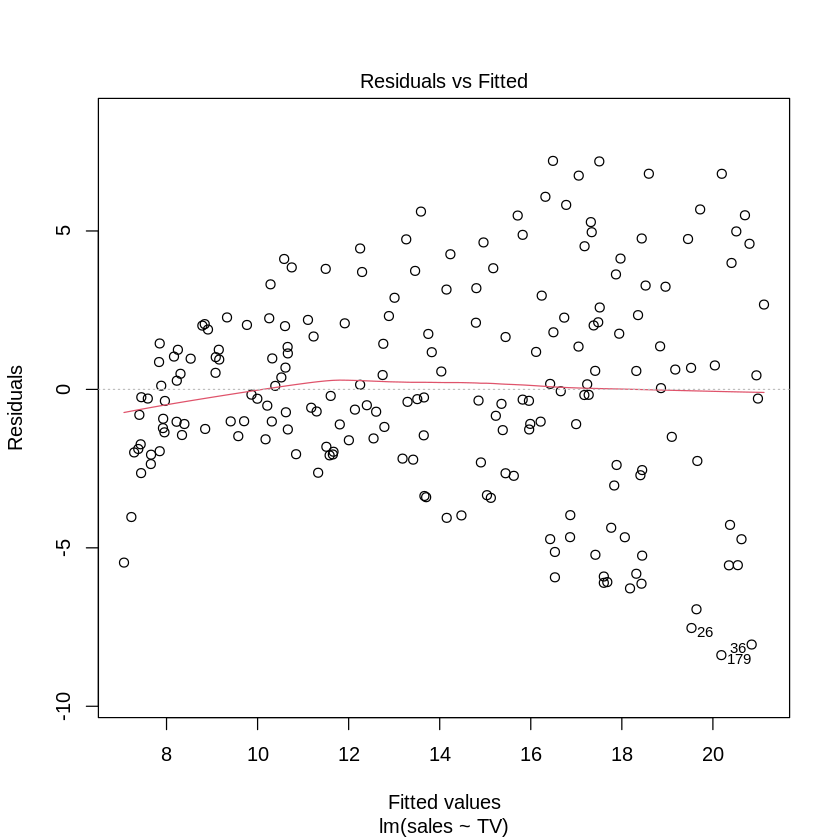

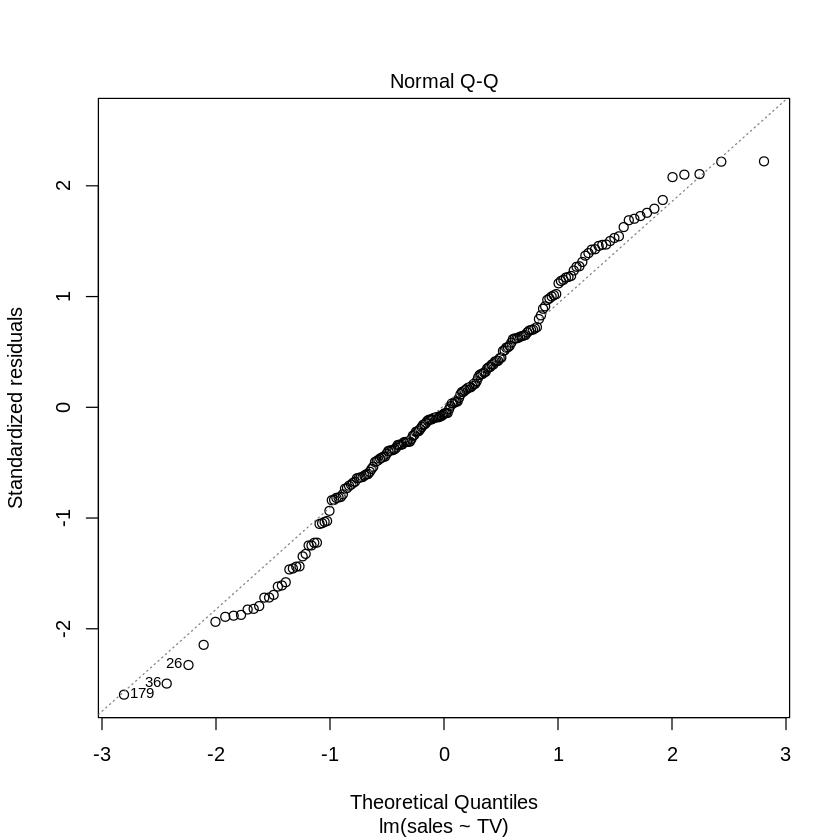

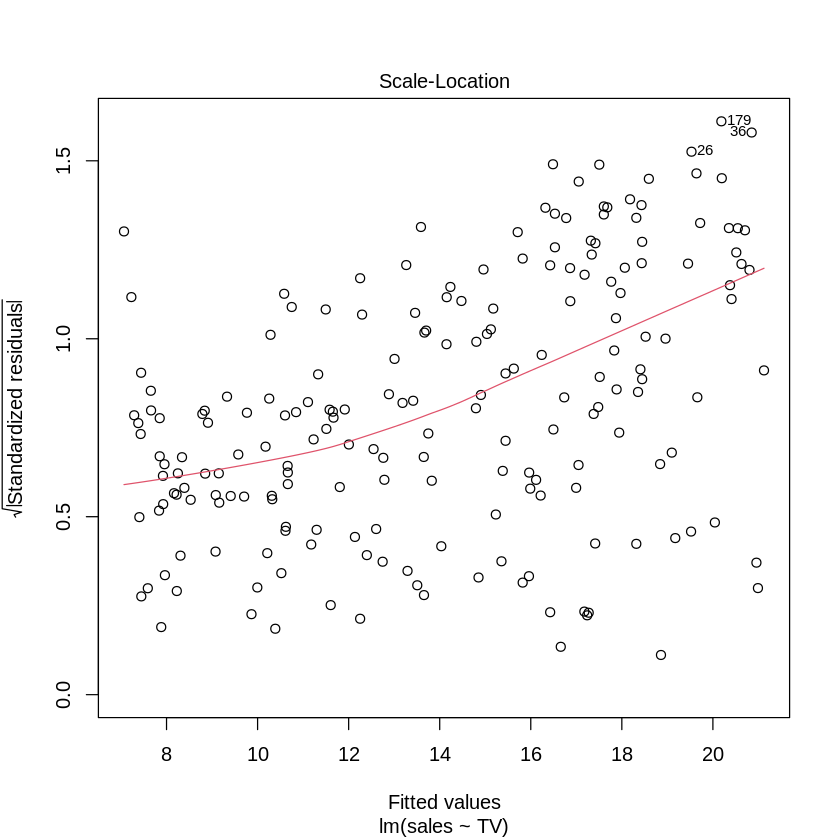

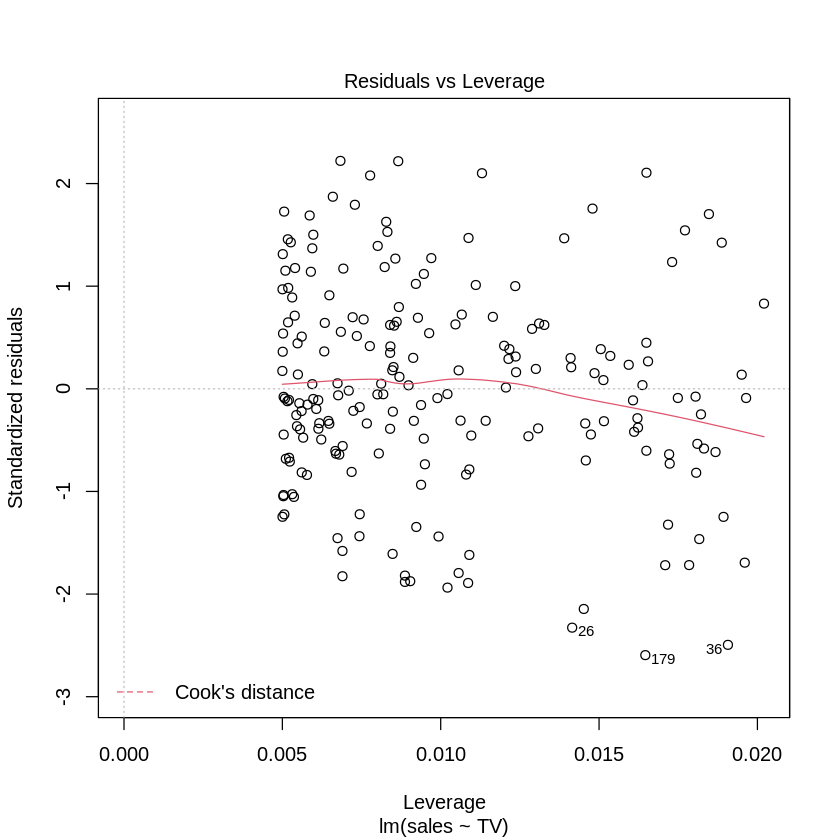

In [16]:
# NOTA
plot(mod2)

In [ ]:
library(ggplot2)
library(dplyr)

In [25]:
mod2$coefficients[2]

TV 
0.04753664

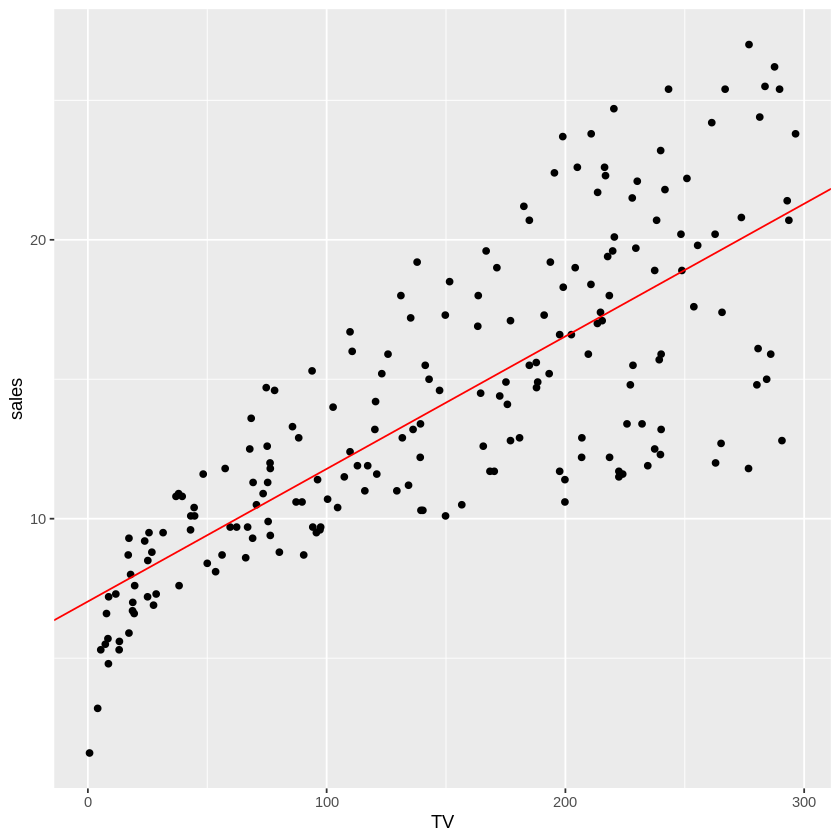

In [26]:
# ¿Cómo podemos agregar la recta predicha al gráfico  de dispersión?
ventas %>%
  ggplot() +
  aes(x = TV, y =sales) +
  geom_point() +
  geom_abline(slope = mod2$coefficients[2], intercept = mod2$coefficients[1], color = "red" )
  


In [29]:
# Si incluimos las covariables restantes?
 mod3 <- lm(sales ~ TV + radio + newspaper, data = ventas)
 summary(mod3)


Call:
lm(formula = sales ~ TV + radio + newspaper, data = ventas)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
radio        0.188530   0.008611  21.893   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


In [30]:
head(ventas)

,TV,radio,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


In [31]:
# función predict() para realizar predicciones
# Si no seingresan nuevos datos, predict genera las predicciones sobre los valores con los que fue entrenado el modelo.
new <- data.frame(TV =c(100, 120, 200),
                  radio = c(50,40,35),
                  newspaper = c(50,50,60)
                  )
new


TV,radio,newspaper
<dbl>,<dbl>,<dbl>
100,50,50
120,40,50
200,35,60


In [37]:
predict(mod3, new,interval = c("confidence"),level = 0.95)

,fit,lwr,upr
1,16.88998,16.37660,17.40336
2,15.91997,15.53254,16.30740
3,18.62812,18.20567,19.05056


## Interpretación de los coeficientes
Uno de los aspectos más característicos de la _regresión lineal_, son los coeficientes que determinan el modelo lineal, debido a la interpretación de estos.
Suponiendo un modelo de la forma 
$$Y_i = \beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + \dots + \beta_pX_{ip}+ \epsilon_i , \text{ donde } \epsilon_i \sim N(0 ,\sigma^2)$$

Es posible mostrar que $\beta_k$ representa a la tasa de cambio de del valor esperado de $Y$ respecto de $X_k$, cuándo esta última aumenta en una unidad.

In [40]:
# Es este último modelo mejor?
mod4 <- lm(sales ~ TV+radio,data = ventas) # Solo por el hecho de que newspapers no esgnificativo para el modelo
summary(mod4)
# Si se aumenta en una unidad el monto invertido en TV, 
#¿Cuál es el aumento esperado en las ventas ?




Call:
lm(formula = sales ~ TV + radio, data = ventas)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7977 -0.8752  0.2422  1.1708  2.8328 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.92110    0.29449   9.919   <2e-16 ***
TV           0.04575    0.00139  32.909   <2e-16 ***
radio        0.18799    0.00804  23.382   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.681 on 197 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8962 
F-statistic: 859.6 on 2 and 197 DF,  p-value: < 2.2e-16


# Variables categóricas en la regresíon lineal

- También son conocidas como "factores" o "variables cualitativas".
- Permiten clasificar observaciones en grupos
- Clasificación por "niveles"
- Por ejemplo: el género de un invidiuo es una variable categórica que puede tomar dos niveles
    - Hombre
    - Mujer
- Serán necesarios algunos pasos adicionales para considerar dichas variables
    - Separación en variables "binarias" (1/0)

Para este ejemplo considerarmos el dataset `LungCapData`, que contiene informacíon sobre la capacidad pulmonar de distintas personas de acuerdo a las siguientes variables 
* `LungCap`: It’s the lung capacity(closing capacity) of the person
* `Age`: It’s how old is the person
* `Height`: It’s how tall is the person
* `Smoke`: If the person smokes or doesn’t smoke
* `Gender`: If are male or female
* `Cesarean`: If they’re born by Cesarean

In [41]:
lung_cap_df <- read.delim("https://raw.githubusercontent.com/majorquev/Introduccion_a_ciencia_de_datos_R_v2/master/Clases/Clase7/LungCapData.txt")

In [42]:
#resumen
head(lung_cap_df)

,LungCap,Age,Height,Smoke,Gender,Caesarean
,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>
1,6.475,6,62.1,no,male,no
2,10.125,18,74.7,yes,female,no
3,9.550,16,69.7,no,female,yes
4,11.125,14,71.0,no,male,no
5,4.800,5,56.9,no,male,no
6,6.225,11,58.7,no,female,no


In [48]:
# Coercionamos las variables character a factor para poder utilizarlas en regresión lineal
# Smoke, Gender, Caesarean
lung_cap_df$Smoke <- as.factor(lung_cap_df$Smoke)
lung_cap_df$Gender <- as.factor(lung_cap_df$Gender)
lung_cap_df$Caesarean <- as.factor(lung_cap_df$Caesarean)

In [49]:
head(lung_cap_df)

,LungCap,Age,Height,Smoke,Gender,Caesarean
,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>
1,6.475,6,62.1,no,male,no
2,10.125,18,74.7,yes,female,no
3,9.550,16,69.7,no,female,yes
4,11.125,14,71.0,no,male,no
5,4.800,5,56.9,no,male,no
6,6.225,11,58.7,no,female,no


In [50]:
summary(lung_cap_df)

    LungCap            Age            Height      Smoke        Gender   
 Min.   : 0.507   Min.   : 3.00   Min.   :45.30   no :648   female:358  
 1st Qu.: 6.150   1st Qu.: 9.00   1st Qu.:59.90   yes: 77   male  :367  
 Median : 8.000   Median :13.00   Median :65.40                         
 Mean   : 7.863   Mean   :12.33   Mean   :64.84                         
 3rd Qu.: 9.800   3rd Qu.:15.00   3rd Qu.:70.30                         
 Max.   :14.675   Max.   :19.00   Max.   :81.80                         
 Caesarean
 no :561  
 yes:164  
          
          
          
          

In [51]:
 # nos preparamos para usar una variable binaria o "dummy"/indicador
# vemos que el tipo de variable es otro, de tipo factor y podemos consultar sus niveles.

levels(lung_cap_df$Smoke)


[1] "no"  "yes"

In [54]:
# Ajustamos un primer modelo de regresión considerando sólo las variables Age y Smoke
mod5 <- lm(LungCap ~ Age + Smoke,data = lung_cap_df)
summary(mod5)


Call:
lm(formula = LungCap ~ Age + Smoke, data = lung_cap_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8559 -1.0289 -0.0363  1.0083  4.1995 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.08572    0.18299   5.933 4.61e-09 ***
Age          0.55540    0.01438  38.628  < 2e-16 ***
Smokeyes    -0.64859    0.18676  -3.473 0.000546 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.514 on 722 degrees of freedom
Multiple R-squared:  0.6773,	Adjusted R-squared:  0.6764 
F-statistic: 757.5 on 2 and 722 DF,  p-value: < 2.2e-16


El modelo de regresión ajustado corresponde a:
$\hat{\mu}_{y|x} = 1.085 + 0.555 \times Age - 0.648 \times Smoke$ 

En el caso de ser fumador:

$\hat{\mu}_{y|x} = 1.085 + 0.555 \times Age - 0.648 \times Smoke$ 

$\hat{\mu}_{y|x} = 1.085 + 0.555 \times Age - 0.648 \times (1)$

$\hat{\mu}_{y|x} = (1.085  - 0.648) + 0.555 \times Age$

$\hat{\mu}_{y|x} = 0.437 + 0.555 \times Age$

En el caso de no ser fumador:

$\hat{\mu}_{y|x} = 1.085 + 0.555 \times Age$ 

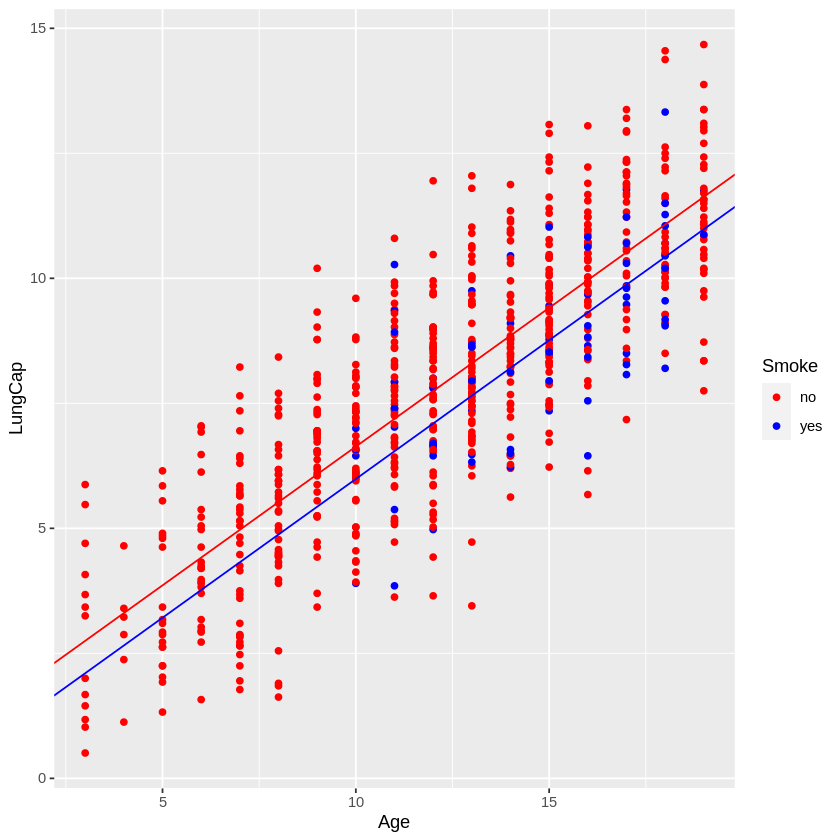

In [58]:
lung_cap_df %>%
ggplot()+
  aes(x = Age, y = LungCap, color = Smoke) +
  geom_point() +
  scale_color_manual(values = c("red","blue")) +
  geom_abline(intercept = 1.085, slope = 0.555, color = "red") +
  geom_abline(intercept = 0.437, slope = 0.555, color = "blue")

`geom_smooth()` using formula 'y ~ x'



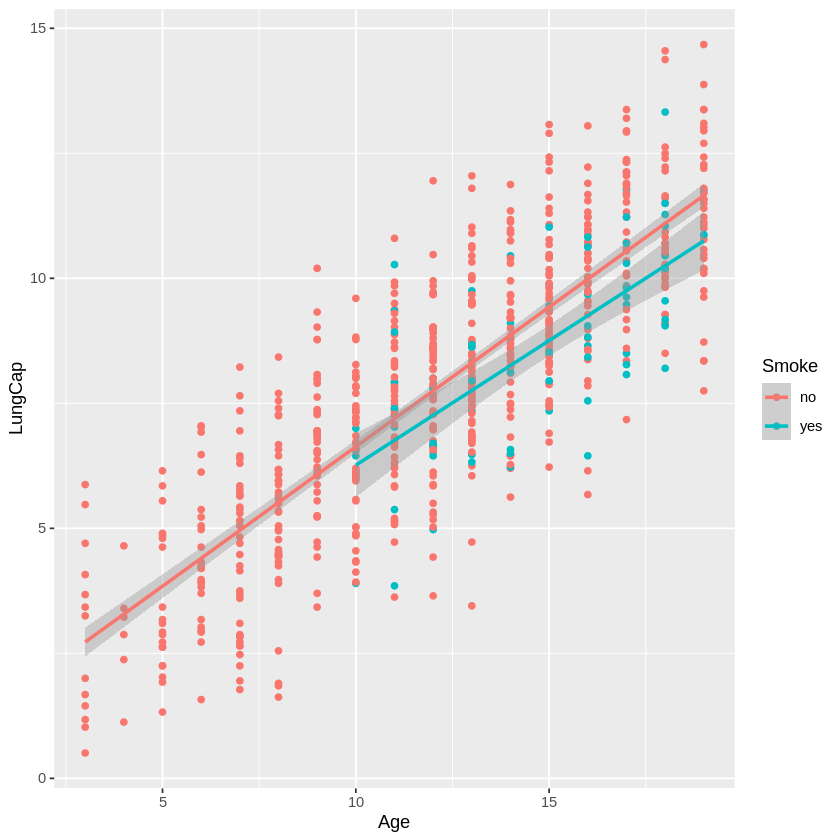

In [57]:
# Podemos replicar el mismo gráfico utilizando geom_smooth() ?
lung_cap_df %>%
ggplot()+
  aes(x = Age, y = LungCap, color = Smoke) +
  geom_point()+
  geom_smooth(method = "lm")

In [65]:
lung_cap_df[1,4] <- NA

In [64]:
mod5 <- lm(LungCap ~ Age + Smoke + Gender ,data = lung_cap_df)
summary(mod5)


Call:
lm(formula = LungCap ~ Age + Smoke + Gender, data = lung_cap_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5903 -0.9348  0.0439  0.9489  4.2671 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.51874    0.18209   2.849  0.00451 ** 
Age          0.55878    0.01357  41.181  < 2e-16 ***
Smokeyes    -0.56717    0.17614  -3.220  0.00134 ** 
Gendermale   1.01613    0.10621   9.567  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.427 on 720 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.7143,	Adjusted R-squared:  0.7131 
F-statistic:   600 on 3 and 720 DF,  p-value: < 2.2e-16
